# Scrapper to extract data from UNINA Website

---


## SmartScraperGraph
**SmartScraperGraph** is a class representing one of the default scraping pipelines. It uses a direct graph implementation where each node has its own function, from retrieving html from a website to extracting relevant information based on your query and generate a coherent answer.

In [ ]:
%%capture
!pip install scrapegraphai --upgrade
!apt install chromium-chromedriver
!pip install nest_asyncio
!pip install playwright
!playwright install

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [3]:
#@title Get API Keys from environment variables
def get_key(key,required=True):
    try:
        from google.colab.userdata import get as getenv
    except ImportError:
        from os import getenv
        import dotenv
        dotenv.load_dotenv()

    value = getenv(key)

    if not value:
        value = input(f"Please enter the value for {key}:")
        if value == "" and required:
            raise ValueError(f"Value for {key} is required")

    return value


OPENAI_API_KEY = get_key("OPENAI_API_KEY")

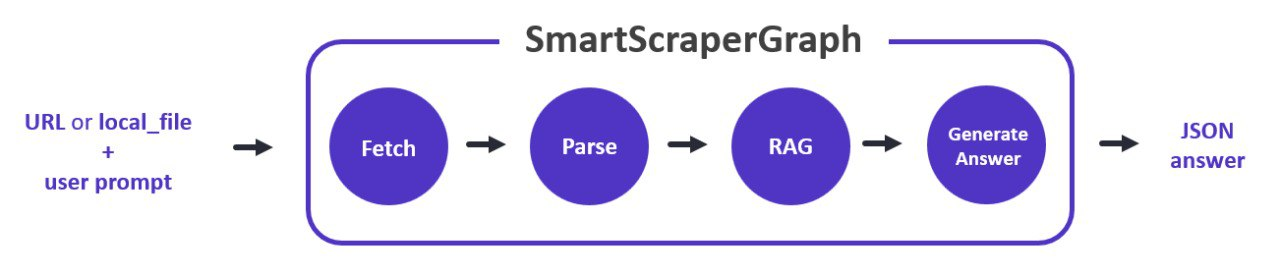

In [5]:
#@title import SmartScraperGraph
from scrapegraphai.graphs import SmartScraperGraph

In [6]:
#@title Define the configuration for the graph
graph_config = {
    "llm": {
        "api_key": OPENAI_API_KEY,
        "model": "gpt-3.5-turbo",
        "temperature":0,
    },
    "verbose":True,
}

In [48]:
#@title Create and run the SmartScraperGraph instance on UNINA Corsi
complete_result = {'courses':[]}

for page in range(1,17):
  smart_scraper_graph = SmartScraperGraph(
      prompt="Get all the links to the different courses with their name, code, department, type, language, and link in JSON format. the page has js content.",
      # also accepts a string with the already downloaded HTML code
      source=f"https://www.corsi.unina.it/?page={page}",
      config=graph_config
  )
  result = smart_scraper_graph.run()
  complete_result["courses"].extend(result["courses"])


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1589.35it/s]
--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1639.04it/s]
--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2041.02it/s]
--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAns

In [49]:
#@title Prettify the result and display the JSON
import json

output = json.dumps(complete_result, indent=2)

line_list = output.split("\n")  # Sort of line replacing "\n" with a new line

for line in line_list:
    print(line)

{
  "courses": [
    {
      "name": "Archaeology and history of art",
      "code": "N70",
      "department": "DIPARTIMENTO DI STUDI UMANISTICI",
      "type": "Laurea Magistrale",
      "language": "Italian",
      "link": "https://www.corsi.unina.it/N70"
    },
    {
      "name": "Archeology, history of arts and science of artistic heritage",
      "code": "P14",
      "department": "DIPARTIMENTO DI STUDI UMANISTICI",
      "type": "Laurea",
      "language": "Italian",
      "link": "https://www.corsi.unina.it/P14"
    },
    {
      "name": "Architecture and heritage",
      "code": "P53",
      "department": "DIPARTIMENTO DI ARCHITETTURA",
      "type": "Laurea Magistrale",
      "language": "English",
      "link": "https://www.corsi.unina.it/P53"
    },
    {
      "name": "Architettura",
      "code": "D06",
      "department": "DIPARTIMENTO DI ARCHITETTURA",
      "type": "Laurea Magistrale Ciclo Unico 5 anni",
      "language": "Italian",
      "link": "https://www.corsi.u

In [50]:
#@title Save link output to file

file_name = 'data/courses_list.json'

# Open the file in write mode and write the output string to it
with open(file_name, 'w') as file:
    file.write(output)

print(f"The output has been saved to {file_name}")

The output has been saved to courses_list.json


In [65]:
#@title Extract links for all the courses
course_links = []

# Iterate through the list of courses
for course in complete_result['courses']:
    # Append the link to the links list
    course_links.append(course['link'])

# Print the list of links
course_links = list(dict.fromkeys(course_links))
course_links

['https://www.corsi.unina.it/N70',
 'https://www.corsi.unina.it/P14',
 'https://www.corsi.unina.it/P53',
 'https://www.corsi.unina.it/D06',
 'https://www.corsi.unina.it/N14',
 'https://www.corsi.unina.it/N17',
 'https://www.corsi.unina.it/D07',
 'https://www.corsi.unina.it/D18',
 'https://www.corsi.unina.it/P16',
 'https://www.corsi.unina.it/P30',
 'https://www.corsi.unina.it/P58',
 'https://www.corsi.unina.it/P54',
 'https://www.corsi.unina.it/P07',
 'https://www.corsi.unina.it/N79',
 'https://www.corsi.unina.it/N80',
 'https://www.corsi.unina.it/N76',
 'https://www.corsi.unina.it/D09',
 'https://www.corsi.unina.it/D08',
 'https://www.corsi.unina.it/M15',
 'https://www.corsi.unina.it/P56',
 'https://www.corsi.unina.it/N75',
 'https://www.corsi.unina.it/N83',
 'https://www.corsi.unina.it/N84',
 'https://www.corsi.unina.it/P42',
 'https://www.corsi.unina.it/M89',
 'https://www.corsi.unina.it/P15',
 'https://www.corsi.unina.it/N22',
 'https://www.corsi.unina.it/N27',
 'https://www.corsi.

In [108]:
#@title Create and run the SmartScraperGraph instance on UNINA distinct courses

courses_details = {}

for page in range(len(course_links)):
  smart_scraper_graph_courses = SmartScraperGraph(
      prompt=f"This is the {page+1}/{len(course_links)} course details page. Extract course Code as key, and course Name, English name, Coordinator, Contacts, Website, Students opinions, Course type, Duration, Language, Degree class, Activation year, School, Department, Locations, and Course Homepage as values. (The webpage has js content).",
      # also accepts a string with the already downloaded HTML code
      source=course_links[page],
      config=graph_config,
      )
  result = smart_scraper_graph_courses.run()
  courses_details.update(result)
  print(f"page {page+1}/{len(course_links)} done.")

--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1795.51it/s]


page 1/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1978.45it/s]


page 2/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1831.57it/s]


page 3/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2037.06it/s]


page 4/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2015.52it/s]


page 5/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 519.42it/s]


page 6/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1707.08it/s]


page 7/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2057.04it/s]


page 8/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1983.12it/s]


page 9/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1704.31it/s]


page 10/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 952.39it/s]


page 11/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2427.26it/s]


page 12/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1962.71it/s]


page 13/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1693.30it/s]


page 14/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1690.57it/s]


page 15/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1793.97it/s]


page 16/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2010.69it/s]


page 17/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1963.63it/s]


page 18/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2012.62it/s]


page 19/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2192.53it/s]


page 20/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1827.58it/s]


page 21/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 570.81it/s]


page 22/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1778.00it/s]


page 23/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1182.49it/s]


page 24/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1501.18it/s]


page 25/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1588.75it/s]


page 26/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1804.00it/s]


page 27/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1691.93it/s]


page 28/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 983.65it/s]


page 29/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1982.19it/s]


page 30/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1837.99it/s]


page 31/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1616.93it/s]


page 32/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2330.17it/s]


page 33/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1878.33it/s]


page 34/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1657.83it/s]


page 35/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2201.73it/s]


page 36/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1853.43it/s]


page 37/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1882.54it/s]


page 38/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2216.86it/s]


page 39/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1942.71it/s]


page 40/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1485.76it/s]


page 41/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1407.48it/s]


page 42/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1874.13it/s]


page 43/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1607.01it/s]


page 44/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1556.33it/s]


page 45/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1879.17it/s]


page 46/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1982.19it/s]


page 47/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1884.23it/s]


page 48/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1927.53it/s]


page 49/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1937.32it/s]


page 50/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2080.51it/s]


page 51/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1738.93it/s]


page 52/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1467.57it/s]


page 53/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1977.51it/s]


page 54/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2417.47it/s]


page 55/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1936.43it/s]


page 56/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2021.35it/s]


page 57/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1799.36it/s]


page 58/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2055.02it/s]


page 59/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1934.64it/s]


page 60/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2097.15it/s]


page 61/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1678.39it/s]


page 62/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2191.38it/s]


page 63/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2268.42it/s]


page 64/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2174.34it/s]


page 65/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2073.31it/s]


page 66/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2049.00it/s]


page 67/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2228.64it/s]


page 68/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2384.48it/s]


page 69/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2124.77it/s]


page 70/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2252.58it/s]


page 71/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1996.34it/s]


page 72/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2092.97it/s]


page 73/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1520.78it/s]


page 74/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1926.64it/s]


page 75/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1779.51it/s]


page 76/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2253.79it/s]


page 77/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1696.04it/s]


page 78/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2057.04it/s]


page 79/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 847.51it/s]


page 80/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1757.14it/s]


page 81/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2091.92it/s]


page 82/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1889.33it/s]


page 83/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2128.01it/s]


page 84/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 386.89it/s]


page 85/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1605.17it/s]


page 86/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2281.99it/s]


page 87/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1902.18it/s]


page 88/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1521.88it/s]


page 89/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1550.57it/s]


page 90/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 944.45it/s]


page 91/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1845.27it/s]


page 92/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2165.36it/s]


page 93/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2146.52it/s]


page 94/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1838.80it/s]


page 95/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1913.46it/s]


page 96/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1886.78it/s]


page 97/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1768.26it/s]


page 98/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1861.65it/s]


page 99/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1467.05it/s]


page 100/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1649.35it/s]


page 101/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2104.52it/s]


page 102/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1973.79it/s]


page 103/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 579.88it/s]


page 104/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2169.84it/s]


page 105/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1797.82it/s]


page 106/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1931.08it/s]


page 107/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1910.84it/s]


page 108/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2041.02it/s]


page 109/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2376.38it/s]


page 110/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2067.18it/s]


page 111/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2080.51it/s]


page 112/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1741.82it/s]


page 113/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1784.81it/s]


page 114/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 369.38it/s]


page 115/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2198.27it/s]


page 116/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2218.03it/s]


page 117/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2039.04it/s]


page 118/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2345.81it/s]


page 119/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1875.81it/s]


page 120/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1675.04it/s]


page 121/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2278.27it/s]


page 122/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2307.10it/s]


page 123/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2064.13it/s]


page 124/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2303.30it/s]


page 125/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2437.13it/s]


page 126/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 704.81it/s]


page 127/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2313.46it/s]


page 128/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2108.75it/s]


page 129/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2264.74it/s]


page 130/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2262.30it/s]


page 131/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1836.39it/s]


page 132/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2026.23it/s]


page 133/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2073.31it/s]


page 134/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2452.81it/s]


page 135/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2225.09it/s]


page 136/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1949.03it/s]


page 137/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2286.97it/s]


page 138/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2106.63it/s]


page 139/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2120.48it/s]


page 140/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2206.37it/s]


page 141/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1746.17it/s]


page 142/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1922.23it/s]


page 143/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 2257.43it/s]


page 144/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 1848.53it/s]


page 145/146 done.


--- Executing Fetch Node ---
--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---
Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 637.04it/s]


page 146/146 done.


In [109]:
courses_details

{'N70': {'Course Name': "ARCHEOLOGIA E STORIA DELL'ARTE",
  'English name': 'ARCHAEOLOGY AND HISTORY OF ART',
  'Coordinator': 'DI MEGLIO ROSALBA',
  'Contacts': 'rosalba.dimeglio@unina.it',
  'Website': 'Not indicated',
  'Students opinions': ['https://opinionistudenti.unina.it/cds/2022-2023/040134/N70',
   'https://opinionistudenti.unina.it/cds/2021-2022/040134/N70',
   'https://opinionistudenti.unina.it/cds/2020-2021/040134/N70'],
  'Course type': 'Laurea Magistrale',
  'Duration': '2 anni',
  'Language': 'Italian',
  'Degree class': 'LM-2 - Classe delle lauree magistrali in Archeologia',
  'Activation year': '2008',
  'School': 'SCUOLA DELLE SCIENZE UMANE E SOCIALI',
  'Department': 'DIPARTIMENTO DI STUDI UMANISTICI',
  'Locations': 'NAPOLI',
  'Course Homepage': 'https://www.corsi.unina.it/N70'},
 'P14': {'Course Name': 'ARCHEOLOGIA, STORIA DELLE ARTI E SCIENZE DEL PATRIMONIO CULTURALE',
  'English name': 'ARCHEOLOGY, HISTORY OF ARTS AND SCIENCE OF ARTISTIC HERITAGE',
  'Coordinat

In [110]:
#@title Prettify the result and display the JSON
import json

output = json.dumps(courses_details, indent=2)

line_list = output.split("\n")  # Sort of line replacing "\n" with a new line

for line in line_list:
    print(line)

{
  "N70": {
    "Course Name": "ARCHEOLOGIA E STORIA DELL'ARTE",
    "English name": "ARCHAEOLOGY AND HISTORY OF ART",
    "Coordinator": "DI MEGLIO ROSALBA",
    "Contacts": "rosalba.dimeglio@unina.it",
    "Website": "Not indicated",
    "Students opinions": [
      "https://opinionistudenti.unina.it/cds/2022-2023/040134/N70",
      "https://opinionistudenti.unina.it/cds/2021-2022/040134/N70",
      "https://opinionistudenti.unina.it/cds/2020-2021/040134/N70"
    ],
    "Course type": "Laurea Magistrale",
    "Duration": "2 anni",
    "Language": "Italian",
    "Degree class": "LM-2 - Classe delle lauree magistrali in Archeologia",
    "Activation year": "2008",
    "School": "SCUOLA DELLE SCIENZE UMANE E SOCIALI",
    "Department": "DIPARTIMENTO DI STUDI UMANISTICI",
    "Locations": "NAPOLI",
    "Course Homepage": "https://www.corsi.unina.it/N70"
  },
  "P14": {
    "Course Name": "ARCHEOLOGIA, STORIA DELLE ARTI E SCIENZE DEL PATRIMONIO CULTURALE",
    "English name": "ARCHEOLOGY

In [111]:
#@title Save course description output to file

file_name = 'data/courses_description.json'

# Open the file in write mode and write the output string to it
with open(file_name, 'w') as file:
    file.write(output)

print(f"The output has been saved to {file_name}")

The output has been saved to courses_description.json


#### Sources

* [ScrapeGraphAI](https://github.com/VinciGit00/Scrapegraph-ai): *A Python library for scraping leveraging large language models*
